In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# read
df = pd.read_csv('data/5guys_flight_data_preprocessed.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DEL15,CRS_ELAPSED_TIME,CARRIER_NAME,...,PREVIOUS_AIRPORT,AWND,PRCP,TAVG,WDF2,WSF2,WT03,WT08,DEL_ORIGIN_COUNT,WT_FOG
0,0,27,0,182,14,12,1028,1.0,1.690223,15,...,53,1.214051,1.235494,-2.485781,1.0097,1.085395,-0.376401,2.327994,2.196709,1
1,0,27,0,2365,14,3,1011,1.0,0.255376,15,...,53,1.214051,1.235494,-2.485781,1.0097,1.085395,-0.376401,2.327994,2.196709,1
2,0,27,0,1481,14,6,600,1.0,0.308031,15,...,53,1.214051,1.235494,-2.485781,1.0097,1.085395,-0.376401,2.327994,2.196709,1
3,0,27,0,2401,14,3,851,0.0,0.255376,15,...,53,1.214051,1.235494,-2.485781,1.0097,1.085395,-0.376401,2.327994,2.196709,1
4,0,27,0,2941,14,12,754,1.0,1.729714,15,...,53,1.214051,1.235494,-2.485781,1.0097,1.085395,-0.376401,2.327994,2.196709,1


Scores for each fold: [0.62969054 0.62964193 0.62980208 0.63173239 0.63007531]
Mean f1 score: 0.630


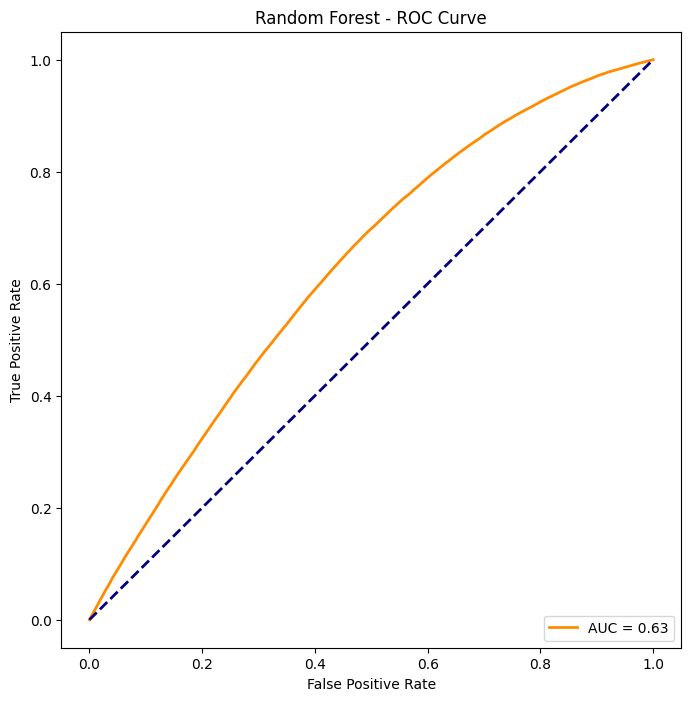

Random Forest - Accuracy: 0.5427919010745164
Random Forest - Confusion Matrix:
[[223861 216550]
 [ 31730  70894]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.51      0.64    440411
         1.0       0.25      0.69      0.36    102624

    accuracy                           0.54    543035
   macro avg       0.56      0.60      0.50    543035
weighted avg       0.76      0.54      0.59    543035



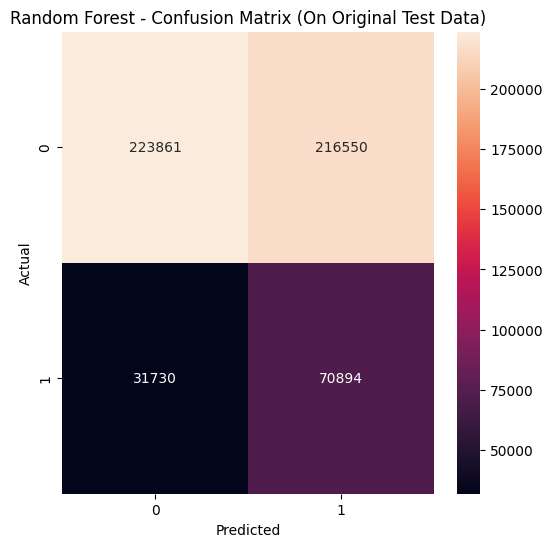

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target
selected_features = ['CRS_DEP_TIME']
target = 'DEP_DEL15'

# Split the dataset into training and testing sets
X = df[selected_features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)



# Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

# Print the mean of the cross-validation scores
print(f'Scores for each fold: {scores}')
print(f'Mean f1 score: {scores.mean():.3f}')

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display metrics
# Evaluate the Random Forest model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Random Forest - Accuracy: {accuracy}')
print('Random Forest - Confusion Matrix:')
print(confusion)
print('Random Forest - Classification Report:')
print(report)

# Confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='rocket', fmt='g', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix (On Original Test Data)')
plt.show()
